http://cs231n.github.io/neural-networks-case-study/#grad

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# generate spiral data of three classes

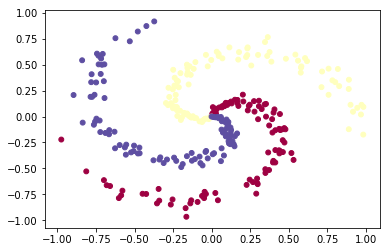

In [7]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype = 'uint8') # class labels

for j in range(K):
    ix = range(N*j, N*(j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4,(j + 1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

    # visualize the data:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 24, cmap = plt.cm.Spectral)
plt.show()

# training softmax linear classifier 

Softmax classifier has a linear score function and uses the cross-entropy loss. The parameters of the linear classifier consist of a weight matrix W and a bias vector b for each class. 

In [8]:
# initialize parameters randomly

W = 0.02 * np.random.randn(D, K) # where D = 2, K = 3
b = np.zeros((1, K))

In [9]:
# compute class scores, parallelly for each class, for a linear classifier 

scores = np.dot(X, W) + b 
# in the case of generated data above, there are 300 2d points 
# after the above multiplication, the array scores will have size 300x3
# where each row gives the class scores corresponding to the 3 classes 

In [10]:
# compute the loss - softmax classifier loss

num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example to make sure row sum is one 
probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
# probs is an array of size 300x3, where each row contains class probabilities

# now query for the log probabilities assigned to the correct classes in the examples
corect_logprobs = -np.log(probs[range(num_examples),y])
# corect_logprobs is a 1D array of just the probabilities assigned to the correct classes for each example 

In [11]:
# Softmax classifier loss is the average cross-entropy loss over the training examples and the regularization:
data_loss = np.sum(corect_logprobs)/ num_examples
reg_loss = 0.5*reg*np.sum(W*W)
# use 0.5 to simplify the math in gradient later 
loss = data_loss + reg_loss

NameError: name 'reg' is not defined

# compute analytic gradient with backpropagation

In [13]:
# Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.098042
iteration 10: loss 0.903141
iteration 20: loss 0.830992
iteration 30: loss 0.798088
iteration 40: loss 0.780838
iteration 50: loss 0.770931
iteration 60: loss 0.764873
iteration 70: loss 0.760999
iteration 80: loss 0.758437
iteration 90: loss 0.756699
iteration 100: loss 0.755496
iteration 110: loss 0.754650
iteration 120: loss 0.754048
iteration 130: loss 0.753614
iteration 140: loss 0.753299
iteration 150: loss 0.753069
iteration 160: loss 0.752899
iteration 170: loss 0.752774
iteration 180: loss 0.752681
iteration 190: loss 0.752612


In [14]:
# convergence occurred when after the 190th iteration of the complete data set 

# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.54


(-1.9660675140147292, 1.9139324859852742)

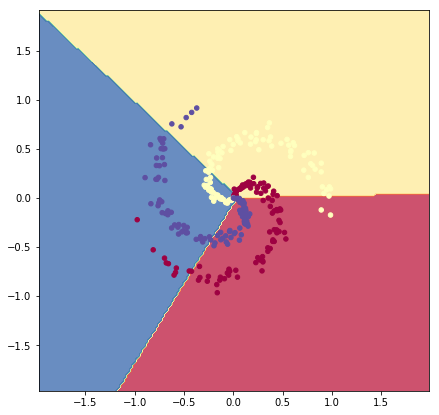

In [19]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (7, 7))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s = 20, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# train a NN

In [20]:
# initialize parameters randomly, 2 sets of weights and biases

h = 100 # size of hidden layer
# connect data input and hidden layers - 2D data and 100 neuron hidden layer
W = 0.01 * np.random.randn(D, h) 
b = np.zeros((1, h))

# connect hidden layer and output classes
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

In [21]:
# forward pass to compute class scores with a 2-layer Neural Network

hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [22]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2


iteration 0: loss 1.098580
iteration 1000: loss 0.300415
iteration 2000: loss 0.261013
iteration 3000: loss 0.255879
iteration 4000: loss 0.254509
iteration 5000: loss 0.252843
iteration 6000: loss 0.251450
iteration 7000: loss 0.250144
iteration 8000: loss 0.249392
iteration 9000: loss 0.248955


In [24]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.9660675140147292, 1.9139324859852742)

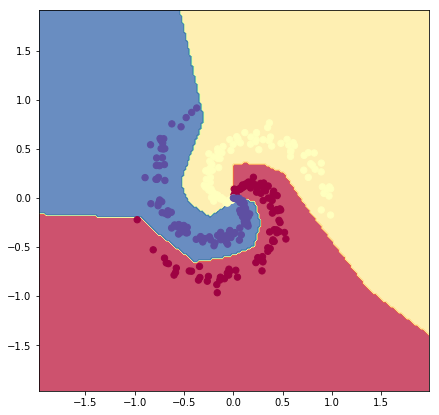

In [35]:
# plot the resulting classifier

h = 0.02
# X is the 2D data, now code the two dimensions as x and y
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# np.c_ Translates slice objects to concatenation along the second axis.
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (7, 7))
# draw contour lines and filled contours, respectively.
plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
